In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #used for slightly fancier plots
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from google.colab import files
from sklearn.preprocessing import LabelEncoder
import io
le = LabelEncoder()
uploaded = files.upload()

train = pd.read_csv(io.BytesIO(uploaded['auto.csv']), sep=',')



Saving auto.csv to auto (2).csv


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
Unnamed: 0           205 non-null int64
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [29]:
train.isnull().sum()

Unnamed: 0            0
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
highway-mpg           0
price                 4
dtype: int64

Dropping values of that we don't know. We have 200 values origionally so we can spare removing about 50 values. 

In [0]:
del train['Unnamed: 0']
train.dropna(subset={'bore'}, axis=0, inplace=True)
train.dropna(subset={'price'}, axis=0, inplace=True)
train.dropna(subset={'stroke'}, axis=0, inplace=True)
train.dropna(subset={'peak-rpm'}, axis=0, inplace=True)
train.dropna(subset={'horsepower'}, axis=0, inplace=True)
train.dropna(subset={'num-of-doors'}, axis=0, inplace=True)
train.dropna(subset={'normalized-losses'}, axis=0, inplace=True)


In [31]:
train.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
highway-mpg          0
price                0
dtype: int64

In [0]:
train['make'] = le.fit_transform(train['make'])
train['fuel-type'] = le.fit_transform(train['fuel-type'])
train['aspiration'] = le.fit_transform(train['aspiration'])
train['num-of-doors'] = le.fit_transform(train['num-of-doors'])
train['body-style'] = le.fit_transform(train['body-style'])
train['drive-wheels'] = le.fit_transform(train['drive-wheels'])
train['num-of-cylinders'] = le.fit_transform(train['num-of-cylinders'])
train['fuel-system'] = le.fit_transform(train['fuel-system'])
train['engine-location'] = le.fit_transform(train['engine-location'])
train['engine-type'] = le.fit_transform(train['engine-type'])


In [33]:
train.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,2,83.0,14,1,0,1,2,1,0,93.7,156.9,63.4,53.7,2050,3,2,97,1,3.62,2.36,9.00,69.0,4900.0,36,5118.0
1,2,121.0,2,1,0,1,2,1,0,88.4,141.1,60.3,53.2,1488,1,4,61,1,2.91,3.03,9.50,48.0,5100.0,53,5151.0
2,1,104.0,6,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1890,2,2,91,1,3.03,3.15,9.00,68.0,5000.0,31,5195.0
3,1,87.0,15,1,0,1,2,1,0,95.7,158.7,63.6,54.5,1985,2,2,92,1,3.05,3.03,9.00,62.0,4800.0,39,5348.0
4,2,161.0,8,1,0,1,2,1,0,93.7,157.3,64.4,50.8,1918,2,2,92,1,2.97,3.23,9.40,68.0,5500.0,41,5389.0
5,1,101.0,4,1,0,1,2,1,0,93.7,150.0,64.0,52.6,1837,2,2,79,0,2.91,3.07,10.10,60.0,5500.0,42,5399.0
6,1,128.0,9,1,0,1,3,1,0,94.5,165.3,63.8,54.5,1889,2,2,97,1,3.15,3.29,9.40,69.0,5200.0,37,5499.0
7,1,118.0,3,1,0,1,2,1,0,93.7,157.3,63.8,50.8,1876,2,2,90,1,2.97,3.23,9.41,68.0,5500.0,41,5572.0
8,1,119.0,11,1,0,1,2,1,0,93.7,157.3,63.8,50.8,1918,2,2,90,1,2.97,3.23,9.40,68.0,5500.0,41,5572.0
9,1,104.0,6,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1900,2,2,91,1,3.03,3.15,9.00,68.0,5000.0,38,6095.0


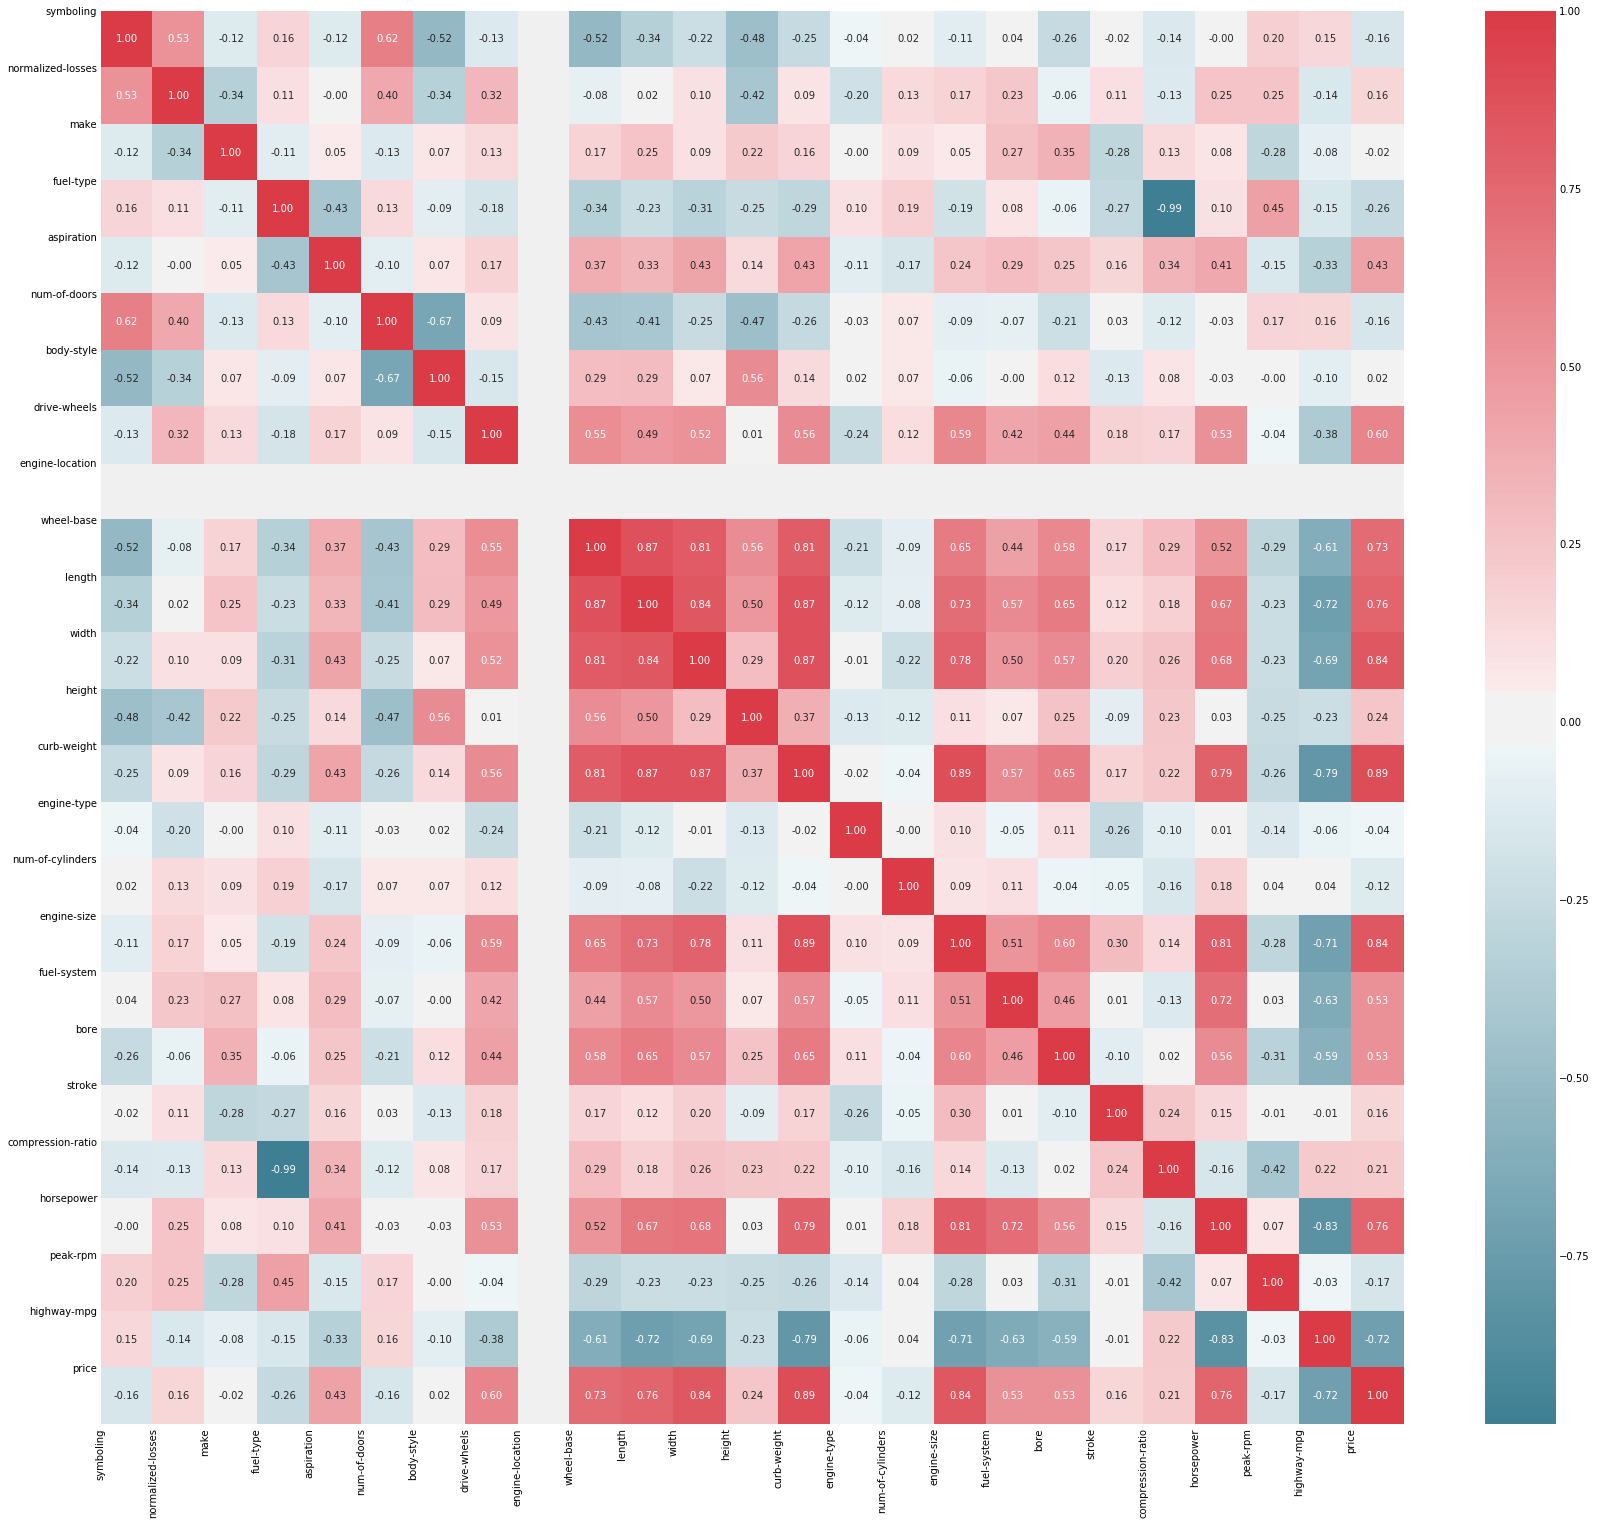

In [40]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(26,26))
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

for highway mpg two values that highly negetive corrilate corrilate are horsepower and crub weight

two values that corrilate highly are price and curb weight. 

width and length also correlate highly, as well as wheele base and length. 

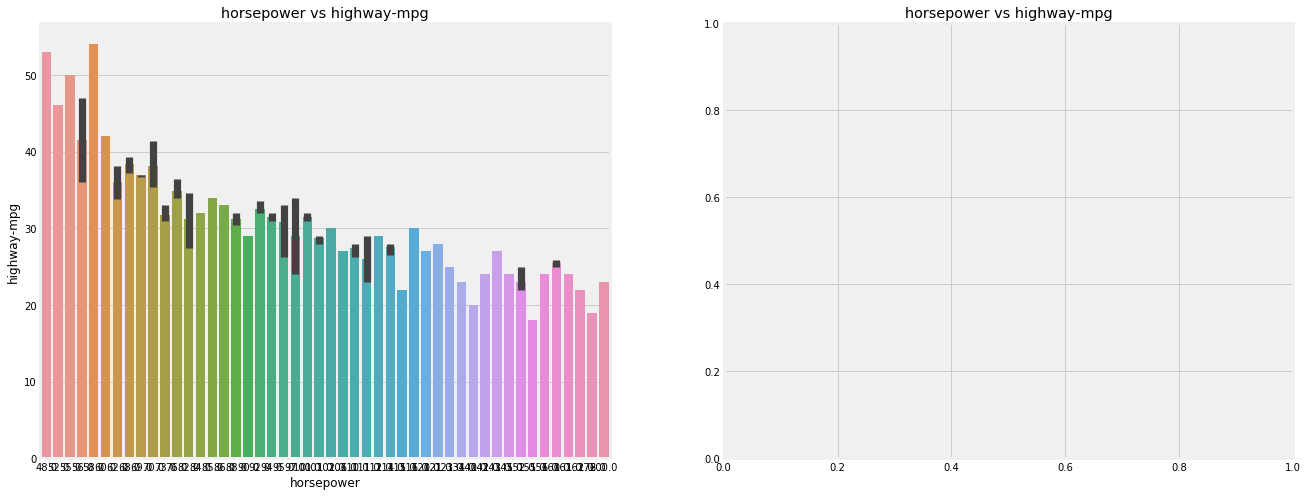

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('horsepower', 'highway-mpg', data=train, ax=ax[0])
ax[0].set_title('horsepower vs highway-mpg')

sns.factorplot('horsepower', 'highway-mpg', data=train, ax=ax[1])
ax[1].set_title('horsepower vs highway-mpg')

plt.close()
plt.show()

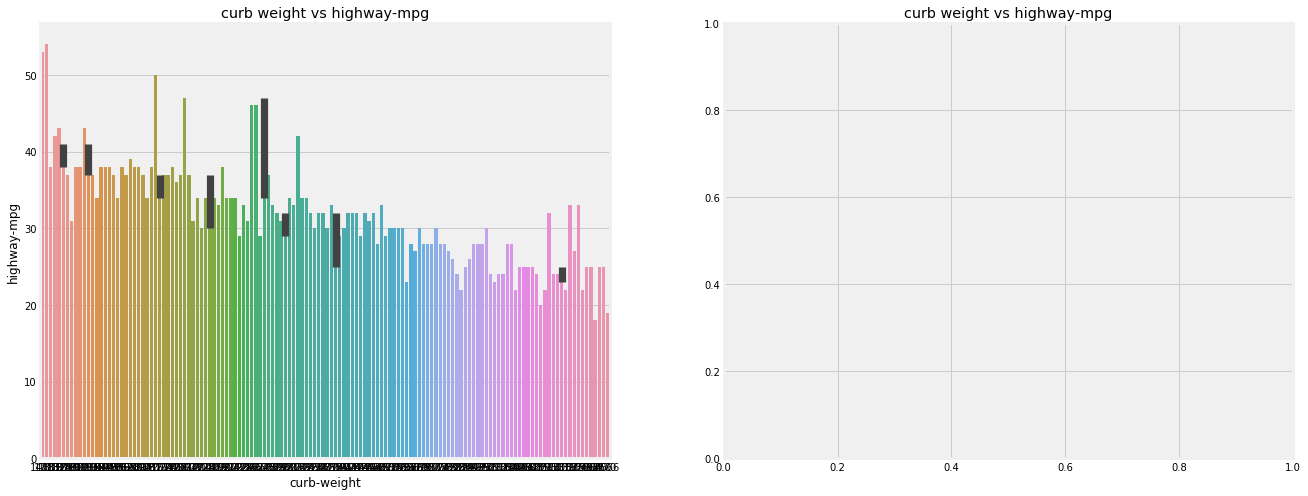

In [76]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('curb-weight', 'highway-mpg', data=train, ax=ax[0])
ax[0].set_title('curb weight vs highway-mpg')

sns.factorplot('curb-weight', 'highway-mpg', data=train, ax=ax[1])
ax[1].set_title('curb weight vs highway-mpg')

plt.close()
plt.show()

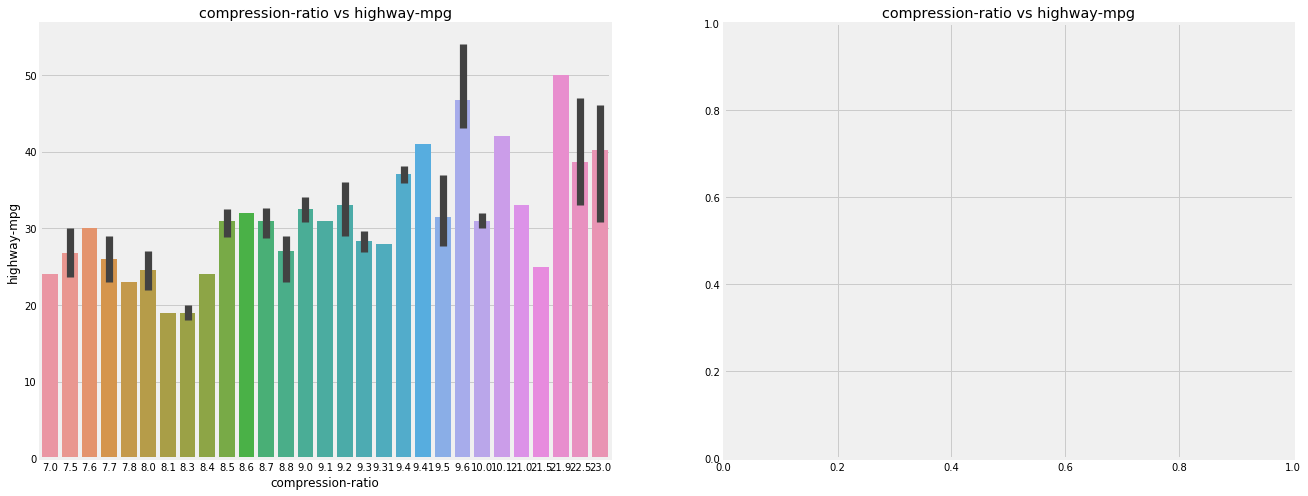

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('compression-ratio', 'highway-mpg', data=train, ax=ax[0])
ax[0].set_title('compression-ratio vs highway-mpg')

sns.factorplot('compression-ratio', 'highway-mpg', data=train, ax=ax[1])
ax[1].set_title('compression-ratio vs highway-mpg')

plt.close()
plt.show()

compression ratio has the best positive corrilation.

In [78]:
pd.crosstab(train['horsepower'], train['highway-mpg']).style.background_gradient(cmap='summer_r')

highway-mpg,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,41,42,43,46,47,50,53,54
horsepower,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
52.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
55.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
56.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
58.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [79]:
pd.crosstab(train['curb-weight'], train['highway-mpg']).style.background_gradient(cmap='summer_r')

In [80]:
pd.crosstab(train['compression-ratio'], train['highway-mpg']).style.background_gradient(cmap='summer_r')

highway-mpg,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,41,42,43,46,47,50,53,54
compression-ratio,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7.5,0,0,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7.6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7.7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8.3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8.4,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
